# **Importing Libraries**

In [324]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
from scipy import stats
import seaborn as sns

# **Data that separated in linear**

## **Create Linear dummy dataset**
create 50 samples with 2 centers (place with many clustered data) and cluster standard deviation 0.60(if we increase the value of cluster_std, the data will be more spread out and if inclined toward zero, data will more clustered).

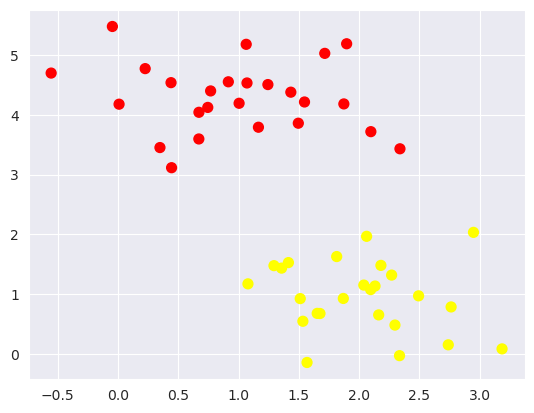

In [325]:
from sklearn.datasets import make_blobs
# generate isotropic Gaussian blobs for clustering
# isotropic means the same variance in all directions
# gaussian blobs means the data is clustered in gaussian distribution
# , gaussian distribution is a bell-shaped curve that is symmetric
#  means the left and right sides of the center are the same
# but with cluster_std, you can control the standard deviation of the 
# clusters, the larger the value, the more spread out the data
X, y = make_blobs(
    n_samples=50,
    centers=2,
    random_state=0,
    cluster_std=0.60
)
# show the data in scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## **Draw lines to separate the data**
To create a classification model, a line separating the data from the two sets formed is needed.  However, this condition still leaves cases where more than one dividing line is needed. 

(-1.0, 3.5)

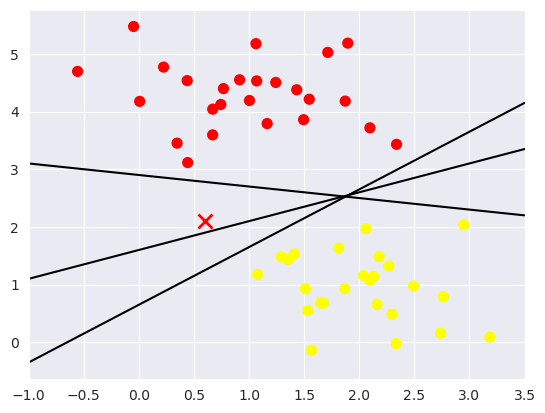

In [326]:
# Return evenly spaced numbers over a specified interval.
# Returns `num` evenly spaced samples, calculated over the
# interval [`start`, `stop`].
# xfit is acronim for x-axis fit, fit means the range of x-axis
xfit = np.linspace(-1, 3.5)
# create a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# draw 'X' symbol at the point (0.6, 2.1)
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
# draw 2 more line to separate the data
# m is slope and b is intercepted 
# also xfit is the range of x-axis(-1 to 3.5)
# and y = mx + b is the equation of line
# also you can call y like yfit to fit the y-axis
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
# set the limit of x-axis to create a good view
plt.xlim(-1, 3.5)

## **Create pipes or margin in lines before**

(-1.0, 3.5)

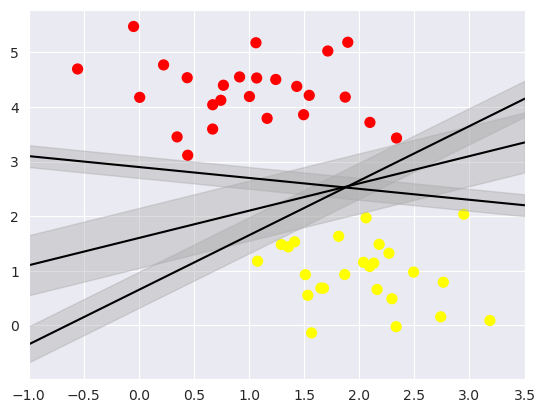

In [327]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# step by step:
# 1. create a line with slope m and intercepted b
# 2. create a margin or pipe with d, d is the distance from the line
# 3. fill the margin with: 
    # fill_between(x, y1, y2) fill the area between two horizontal curves. 
    # this function creates a polygon patch that outlines the filled region.
    # edgecolor='none' means no edge color, 
    # color='#AAAAAA' means the color of the filled region
    # alpha=0.4 means the transparency of the filled region
# 4. repeat the steps 1 to 3 for each line
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    # for y1 and y2, the margin is added and subtracted by d or distance
    # this to crete distance in above and below the line
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5)

## **Train or Fitting SVM model**

In [328]:
# if SVR for regression, SVC is for classification
# SVC is => support vector classifier
from sklearn.svm import SVC
# create a model and fit the data
# fit means to train the model with the data
# kernel='linear' means the line is linear
# ussually linear kernel is used for data that is linearly separable
# C is the regularization parameter or Cost landing on the margin or 
# the error of the model. The larger the value of C, the smaller the margin
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

## **Visualize the model**

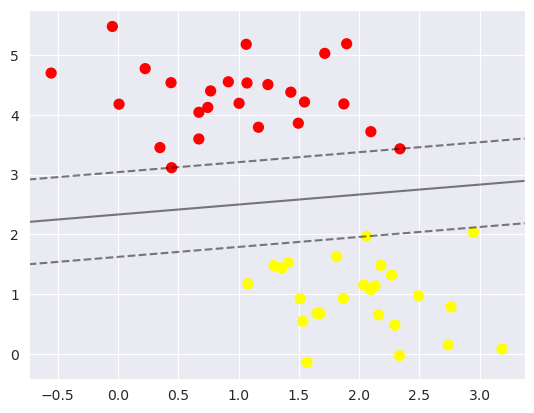

In [329]:
# create a function to draw the SVM model
def plot_svc_decision_function(model, ax=None, plot_support=True):
    # ax is the axis of the plot, if None, 
    # then use plt.gca() to get the current axis
    if ax is None:
        ax = plt.gca()
    # get the limits of x-axis and y-axis
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    # linspace(start, stop, num) returns `num` evenly spaced samples,
    # num is the number of samples, why we devide xlim and ylim to array 
    # of 30? because we want to create a grid of x and y values to 
    # evaluate the model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    # meshgrid return coordinate matrices from coordinate vectors
    # this mean to create a grid of x and y values to evaluate the model
    Y, X = np.meshgrid(y, x)
    # xy is the grid of x and y values
    # vstack is to stack arrays in sequence vertically with X and Y flattened
    # with ravel() to return a contiguous flattened
    # and '.T' is to return the transpose of the array
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # P is the decision boundary of the model
    # decision boundary is the line that separates the data
    # reshape the decision boundary to the shape of X
    # decision_function is to evaluate the decision function for the samples in X
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    # contour plot is to draw contour lines
    # contour line is a curve along which the function has a constant value
    # in this case, the decision boundary is the line that separates the data
    # contour(X, Y, P) draw contour lines at the specified level
    #  with X is the x-axis, Y is the y-axis, 
    #  and P is the decision boundary
    # colors='k' is the color of the contour lines
    # levels=[-1, 0, 1] is the level of the contour lines
    # alpha=0.5 is the transparency of the contour lines
    # linestyles=['--', '-', '--'] is the style of the contour lines
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# show the data in scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# draw the SVM model
plot_svc_decision_function(model)

## **Show the support vectors coordinate**

In [330]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## **Conclusion And Comparision two fitting model**
The fitting results are the key to the success of a classifier (which is only seen from the position of the support vector).  

Other data that is far from the margin and remains in the right area does not have the ability to modify the fitting (because it is not a support vector).

These data do not contribute to the loss function used for fitting the model.  To better understand this, 60 and 120 initial data are used as examples in the form of comparison.

So in this example will show, althought number sample we use is 60 and 120, the support vector is the same. This is because the data that is far from the margin and remains in the right area does not have the ability to modify the fitting (because it is not a support vector). 

support vectors for N=60: [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
support vectors for N=120: [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


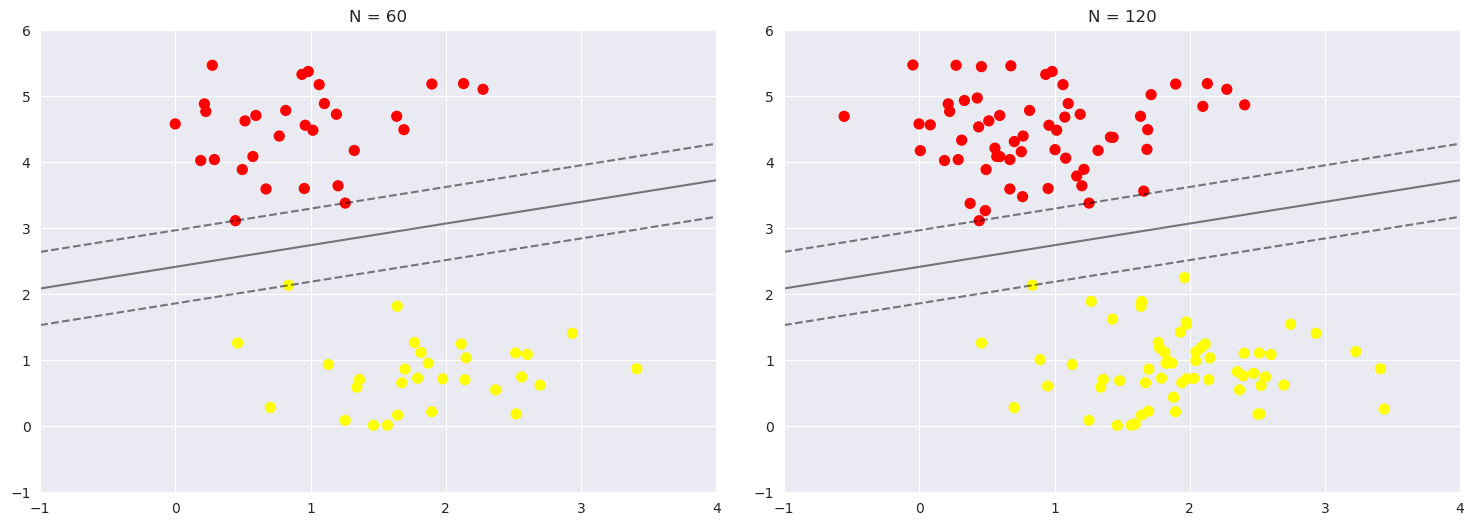

In [331]:
# this function is to create a plot of SVM model
# with N is the number of samples
# and ax is the axis of the plot
def plot_svm(N=10, ax=None):
    # create dummy data with 200 samples, 2 centers,
    # and cluster standard deviation 0.60
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    # limit the number of samples to N
    X = X[:N]
    y = y[:N]
    # create a model and fit the data
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    # create a scatter plot
    # ax is the axis of the plot and if None,
    # then use plt.gca() to get the current axis
    ax = ax or plt.gca()
    # scatter plot of the data
    # X[:, 0] is the x-axis of the data 
    # and X[:, 1] is the y-axis of the data
    # c=y is the color of the data (yellow and red)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    # set the limit of x-axis and y-axis of 
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    # draw the SVM model
    plot_svc_decision_function(model, ax)

# create a figure with 2 subplots with size 16x6 inches
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# adjust the subplots with left=0.0625, right=0.95, wspace(white space)=0.1
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# create a plot for each subplot
# with N = 60 and N = 120, N is the number of samples
# and ax is the axis of the plot
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))
    print(f'support vectors for N={N}: {model.support_vectors_}')

# **Data that not separated in linear**

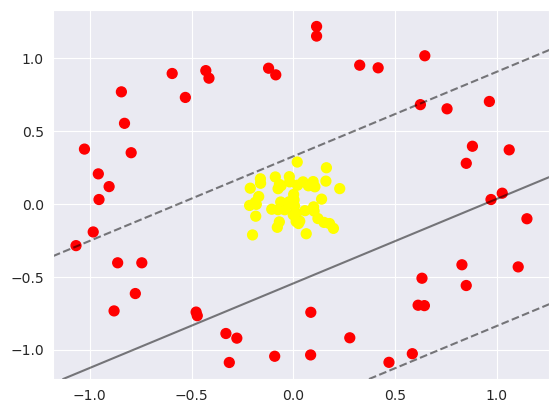

In [332]:
from sklearn.datasets import make_circles
# generate a large circle containing a smaller circle in 2d
# factor is the relative size of the inner circle
# noise is the standard deviation of the points
X, y = make_circles(100, factor=.1, noise=.1)
# clf is an acronym for classifier
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

## **Conclusion from plot above**
Based on the example data above, no linear dividing line was found that could act as a data separator.
Therefore, another projection (point of view) on the data is needed so that the data can be separated clearly.  
In this activity, the projection used is a radial-based projection. 

## **Manual Radial Basis Function**

In [333]:
# r is acronim for radial, this is the radial basis function
# this for the data that is not linearly separable
# the data is projected to a higher dimension
# and the data is separated by a line
# this is called the kernel trick
# np.exp is the exponential function
# '-' used to subtract the data
# X ** 2 is the square of X
# .sum(1) is the sum of the data in the second axis
r = np.exp(-(X ** 2).sum(1))

### **Visualize the radial basis function in 3d**

In [334]:
# from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-4.18481169e-02, -4.09354317e-02],
       [-7.44275754e-01, -4.04752755e-01],
       [ 4.80039838e-02,  1.50367215e-01],
       [ 1.39310512e-01,  3.18393319e-02],
       [-1.69771171e-01,  4.96707700e-02],
       [ 9.77445047e-02,  1.52201799e-01],
       [-8.80633364e-01, -7.34546500e-01],
       [-1.21282425e-01,  9.29606464e-01],
       [-7.76175579e-01, -6.15456517e-01],
       [ 5.74853706e-02, -4.72169013e-02],
       [-9.58065088e-01,  2.05192752e-01],
       [ 5.85242046e-01, -1.02795197e+00],
       [-2.00073207e-01, -2.13568409e-01],
       [-1.84380754e-01, -8.51441977e-02],
       [-2.14417054e-01, -1.12874131e-02],
       [ 8.64074404e-02, -7.44075250e-01],
       [ 6.46641173e-01,  1.01493436e+00],
       [ 3.26670455e-01,  9.50306167e-01],
       [ 1.06145519e+00,  3.69854335e-01],
       [ 1.51208953e-01, -1.27713037e-01],
       [ 6.22290319e-03, -1.44951515e-02],
       [-7.93096482e-05, -7.56995272e-02],
       

### **Conclusion from manual solution above**
although the data can be displayed separately.  Projection of N data points into N dimensions causes the computational load to increase.  To overcome this, the radial basis function (RBF) kernel in Scikit-Learn is used. 


## **Radial Basis Function from Sckit-Learn**

In [335]:
# clf is an acronym for classifier
# this is the radial basis function
# kernel='rbf' is the radial basis function
# gamma is the kernel coefficient for 'rbf', 'poly', and 'sigmoid'
# gamma is the inverse of the standard deviation of the RBF kernel
# if gamma is large, the standard deviation is small
# if gamma is small, the standard deviation is large
# but here we use the default value of gamma which is 1/n_features
# C is the regularization parameter or Cost landing on the margin or
# the error of the model. The larger the value of C, the smaller the margin
clf = SVC(kernel='rbf', C=1.0)
clf.fit(X, y)

SVC()

## **Visualize the radial basis function from Sckit-Learn**

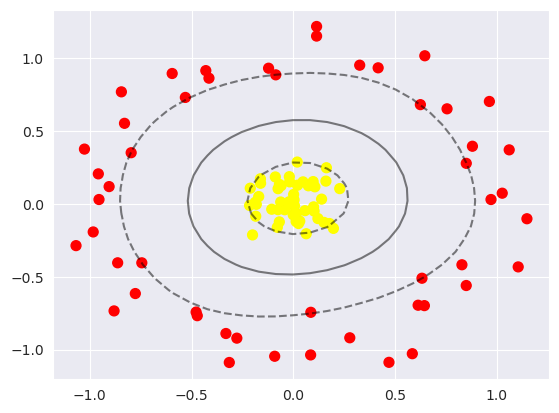

In [336]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### **Conclusion from plot above**
The radial basis function (RBF) kernel in Scikit-Learn is used to project the data into a higher dimension. 
Different from the manual solution, the RBF kernel in Scikit-Learn is more efficient because it uses a kernel coefficient (gamma) that is inversely proportional to the standard deviation of the RBF kernel.
The larger the value of gamma, the smaller the standard deviation.  The smaller the value of gamma, the larger the standard deviation.  In this case, the default value of gamma is 1/n_features.

# **Data that Overlap**

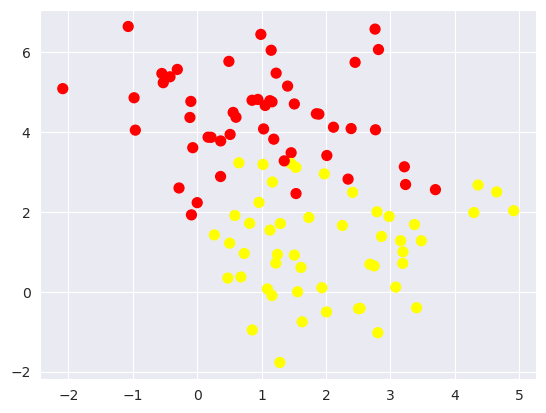

In [337]:
# here example of data that overlap
# create a dummy data with 100 samples, 2 centers,
# and cluster standard deviation 1.2 also random state 0
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
# show the data in scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## **Solution**
To overcome this, the margin smoothing technique in SVM can be applied.  
This technique functions to insert several data points into the margin to produce better fitting.

The thickening of the margin resulting from the smoothing technique is managed by a tuning parameter (known as C).
C is actually a regularization parameter that controls the trade-off between smooth decision boundaries and classifying the training points correctly.
Regularization means the penalty of the error in the model.  The larger the value of C, the smaller the margin.  The smaller the value of C, the larger the margin.

C also known as the cost of the error, for tolerance of the error in the model
This have pros and cons, the pros are that the model can be more flexible and the cons are that the model can be overfitting.
It should be noted that the optimal value of a C depends on each dataset (via cross-validation or similar procedures) and the value of C can be adjusted to get the best results.
Other solution for optimal value of C is using grid search or randomized search.  

The example below shows changes in C impacting the final fitting results. 

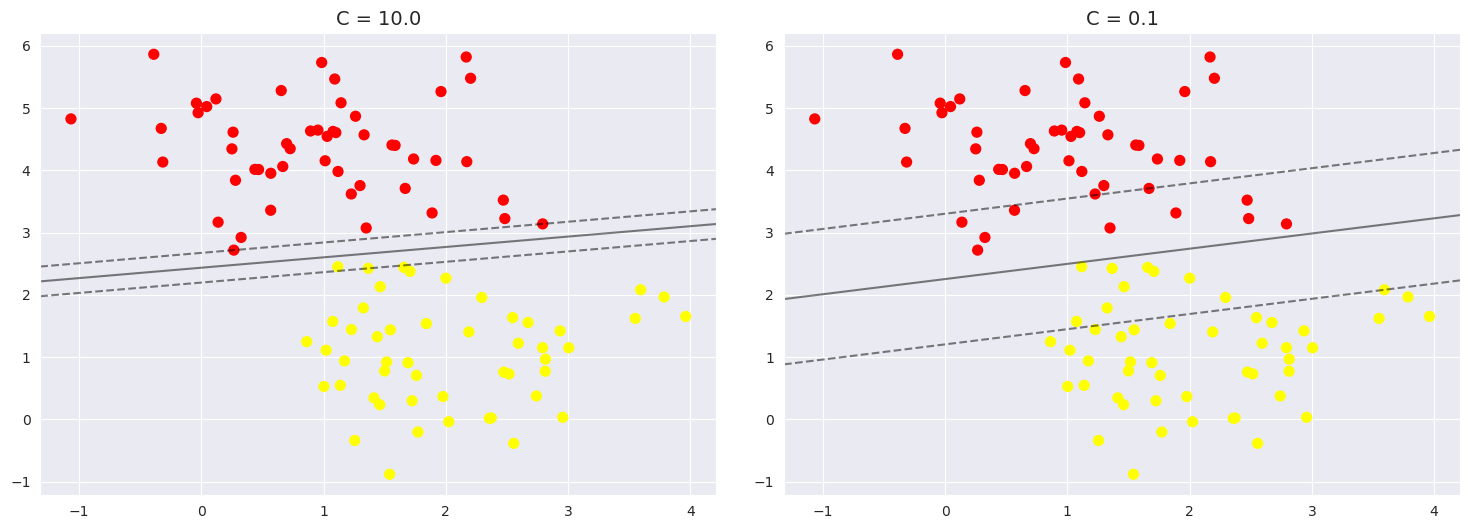

In [339]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)